# Importamos las librerias necesarias

In [3]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [4]:
#Read dataset
df_train =  pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")

In [5]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df_train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df_train.corr()["count"]

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [9]:
data = np.asarray(df_train.corr()).reshape(11,11)

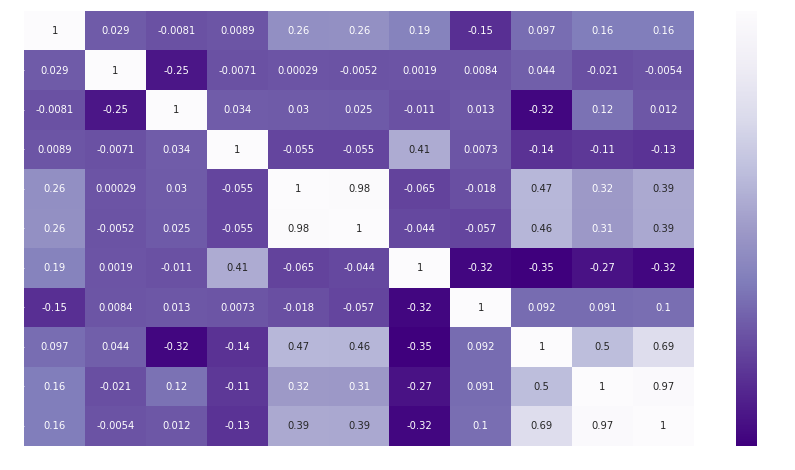

In [10]:
plt.figure(figsize=(15,8))
with plt.style.context('dark_background'):
    sns.heatmap(data, annot=True, cmap="Purples_r")
    plt.show()

# ESTO SE DEBE CAMBIAR ---------------->

In [11]:
from datetime import datetime

df_train["year"] = df_train["datetime"].map(lambda s:s.split("-")[0]).astype(int)
df_train["month"] = df_train["datetime"].map(lambda s:s.split("-")[1]).astype(int)
df_train["date"] = df_train["datetime"].map(lambda s:s.split("-")[2].split()[0]).astype(int)
df_train["weekday"] = df_train["datetime"].map(lambda s:datetime.strptime(s.split()[0],"%Y-%m-%d").weekday())
df_train["hour"] = df_train["datetime"].map(lambda s:s.split()[1].split(":")[0]).astype(int)
df_train.drop("datetime",axis=1,inplace=True)

In [12]:
df_train["target"] = df_train["count"]
df_train.drop("count", axis=1,inplace=True)

In [13]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,date,weekday,hour,target
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,5,0,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,5,1,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,5,2,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,5,3,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,5,4,1


In [14]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_pred = rf.predict(X_test)

In [24]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [27]:
grid_search.fit(X_train, y_train)

grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [28]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [29]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 9.9834 degrees.
Accuracy = 80.87%.
